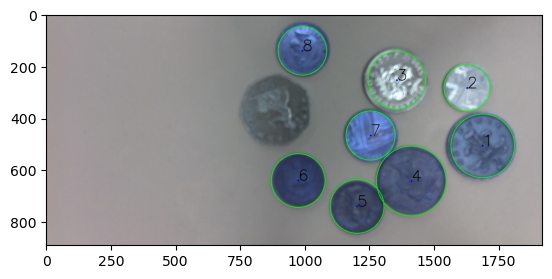

In [2]:
import numpy as nu
import cv2
import matplotlib.pyplot as plt

def get_rad(circles):
    lst_of_rad=[]
    for i in circles[0,:]:
        lst_of_rad.append(i[2])
    return lst_of_rad

def avi_pix(img,circles,size):
    avi=[]
    for i in circles[0,:]:
        av=nu.mean(img[i[1]-size:i[1]+size,i[0]-size:i[0]+size])
        avi.append(av)
    return avi


img=cv2.imread('coin.png',cv2.IMREAD_GRAYSCALE)# Convert image from RGB to grayscale
orig=cv2.imread('coin.png',1)                  # Read .png image
blurr=cv2.GaussianBlur(img,(5,5),0)

# Perform Hough Circles to identify circles in the image

circles=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,135,param1=70,param2=35,minRadius=75,maxRadius=140)
count =1

# Draw the circles identified on the original image

if circles is not None:
    circles= nu.uint16(nu.around(circles))
    
    for i in circles[0,:]:
        cv2.circle(orig,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(orig,(i[0],i[1]),2,(0,0,255),3)
        cv2.putText(orig,str(count),(i[0],i[1]),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,0),2)
        count+=1

# Show the image with circles        
        
plt.imshow(orig)
k=cv2.waitKey(0)
cv2.destroyAllWindows()

